# Çok Katmanlı Yapay Sinir Ağları Diyabet Teşhisi 150320037 Orçun Or

## Gerekli Kütüphanelerin İmport İşlemleri

In [5]:
import numpy as np
import pandas as pd

import re
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

## Veri Gözlemi

In [6]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.sample(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
161,7,102,74,40,105,37.2,0.204,45,0
47,2,71,70,27,0,28.0,0.586,22,0
463,5,88,78,30,0,27.6,0.258,37,0
172,2,87,0,23,0,28.9,0.773,25,0
337,5,115,76,0,0,31.2,0.343,44,1
570,3,78,70,0,0,32.5,0.270,39,0


In [9]:
df.shape

(768, 9)

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.describe()  ## mean --> ortalama
               ## std --> standart sapma
               ## min --> minimum değer
               ## max --> maksimum değer
               ## count --> veri sayısı

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
print("Hamilelik sayısı:",df['Pregnancies'].count())

Hamilelik sayısı: 768


In [14]:
df.isnull().sum() # veri kümesinde eksik değer yok

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Veri Görselleştirme

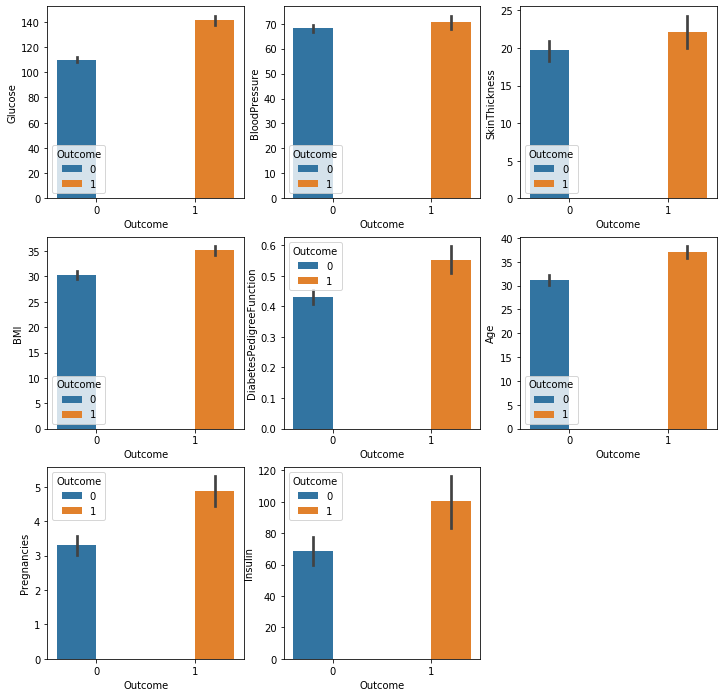

In [15]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=df,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=df,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=df,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=df,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=df,hue="Outcome")
plt.subplot(3,3,7)
sns.barplot(x='Outcome',y='Pregnancies',data=df,hue="Outcome")
plt.subplot(3,3,8)
sns.barplot(x='Outcome',y='Insulin',data=df,hue="Outcome")

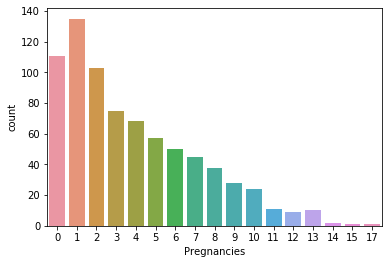

In [16]:
sns.countplot(x="Pregnancies",data=df)

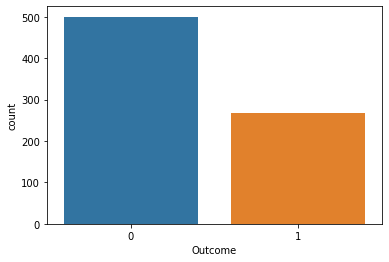

In [17]:
sns.countplot(x="Outcome",data=df)

## Veri Bölme

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split (X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

## Datasetini train ve test olarak böldüm. %70 train %30 test seti.

In [19]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


In [20]:
y_train.head()

334    0
139    0
485    1
547    0
18     0
Name: Outcome, dtype: int64

In [21]:
X_test.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
619,0,119,0,0,0,32.4,0.141,24
198,4,109,64,44,99,34.8,0.905,26
538,0,127,80,37,210,36.3,0.804,23
329,6,105,70,32,68,30.8,0.122,37
302,5,77,82,41,42,35.8,0.156,35


In [22]:
y_test.tail()

619    1
198    1
538    0
329    0
302    0
Name: Outcome, dtype: int64

## Standardizasyon

In [23]:
from sklearn.preprocessing import StandardScaler  

In [24]:
scaler = StandardScaler() ## Standartlaştırma işlemi

In [25]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [27]:
X_train_scaled[0:5]

array([[-0.8362943 , -0.80005088, -0.53576428, -0.15714558, -0.18973183,
        -1.06015343, -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365,  0.55361931,  2.13020339,
         0.64646721, -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566,  1.39361417,  1.47853619,
         1.35537117, -0.30699103, -0.77729576],
       [ 0.08397217,  0.31417602, -0.09322566,  0.03669939,  0.74866893,
         0.14760887, -0.90681191, -0.43466673],
       [-0.8362943 , -0.5524449 , -2.19528409,  1.13515422,  0.02749057,
         1.48664968, -0.83951493, -0.00638043]])

## Model&Tahmin

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [ ]:
mlpc.coefs_   #Sinir ağının kullannmış olduğu katsayılar beta0

In [ ]:
mlpc.intercepts_ #Sinir ağının kullannmış olduğu katsayılar beta1

In [30]:
y_pred = mlpc.predict(X_test_scaled)
print("Doğruluk oranı: " + str(accuracy_score(y_test, y_pred)*100)) 
## Tahmin ettiğim çıkış değerlerini gerçek çıkış değerleriyle karşılaştırıyorum.

Doğruluk oranı: 74.45887445887446


## Model Tuning

In [31]:
mlpc_params = {"alpha": [0.1, 1, 0.01, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (10,10),
                                     (50,50,50),
                                     (100,100),
                                     ],
              "solver" : ["lbfgs","adam",],
              "activation": ["relu","logistic","tanh"]}

In [32]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 5, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  6.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['re

In [52]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (10, 10), 'solver': 'adam'}


In [53]:
mlpc_tuned = MLPClassifier(activation = "tanh", 
                           alpha = 0.00001, 
                           hidden_layer_sizes = (10,10),
                          solver = "adam")

In [59]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [60]:
y_pred = mlpc_tuned.predict(X_test_scaled)
print("Doğruluk oranı : " + str(accuracy_score(y_test, y_pred)*100))

Doğruluk oranı : 75.75757575757575


In [34]:
print("Hata Oranı : " + str(np.sqrt(mean_squared_error(y_test, y_pred))))


Hata Oranı : 0.49236596391733095


In [35]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
619,0,119,0,0,0,32.4,0.141,24
198,4,109,64,44,99,34.8,0.905,26
538,0,127,80,37,210,36.3,0.804,23
329,6,105,70,32,68,30.8,0.122,37


In [36]:
y_final = mlpc_tuned.predict(X_test_scaled)

y_final

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
submission = pd.DataFrame({
        "Outcome": y_final
    })
submission.head()
submission.to_csv('diabetes2.csv', index=False)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.61      0.64        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.76       231



## Yeni Birey Hastalık Teşhisi

In [40]:
from collections import OrderedDict
new_data = OrderedDict([
    ('Pregnancies', 6),
    ('Glucose', 148),
    ('BloodPressure', 72),
    ('SkinThickness', 35),
    ('Insulin', 0),
    ('BMI', 33.6),
    ('DiabetesPedigreeFunction', 0.627),
    ('Age', 50)
])


new_df_data = pd.DataFrame(data = new_data, index = ["800"] , columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
new_df_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
800,6,148,72,35,0,33.6,0.627,50


In [41]:
X_teshis_person = X_test.append(new_df_data)

In [42]:
X_teshis_person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
198,4,109,64,44,99,34.8,0.905,26
538,0,127,80,37,210,36.3,0.804,23
329,6,105,70,32,68,30.8,0.122,37
302,5,77,82,41,42,35.8,0.156,35


In [43]:
scaler.fit(X_teshis_person)
X_teshis_person_scaled = scaler.transform(X_teshis_person)

In [44]:
X_teshis_person_scaled

array([[ 0.52194989, -0.74358835, -0.44636067, ...,  0.23241834,
        -0.15466352,  0.77866082],
       [-0.59410886, -0.29324806,  0.3298503 , ...,  0.43388162,
        -1.08120009, -1.0629911 ],
       [-0.59410886, -0.42191672, -0.17240386, ..., -0.14680666,
        -1.04834419, -1.0629911 ],
       ...,
       [ 0.52194989, -0.51841821,  0.10155296, ..., -0.14680666,
        -1.16662545,  0.27639212],
       [ 0.2429352 , -1.41909879,  0.64946659, ...,  0.4457324 ,
        -1.05491537,  0.10896922],
       [ 0.52194989,  0.86476982,  0.1928719 , ...,  0.18501521,
         0.49259785,  1.36464098]])

In [45]:
teshis_person = X_teshis_person_scaled[-1]

teshis_person = pd.Series(teshis_person).values.reshape(1,-1)

In [48]:
y_teshis_person = mlpc_tuned.predict(teshis_person)

y_teshis_person 

print("Tahmin sonucu : " + str(y_teshis_person))
if y_teshis_person == 1:
    print('Diyabet teşhisi konulmuştur.')
else:
    print('Diyabet değilsiniz.')

Tahmin sonucu : [1]
Diyabet teşhisi konulmuştur.
